# AidSDK部署-三十类水果-预测单张图像

同济子豪兄 2023-6-25

本代码在AidLux手机端运行

## 导入工具包

In [1]:
import cv2
import PIL
from cvs import *

import numpy as np

from PIL import Image, ImageFont, ImageDraw

import aidlite_gpu

import matplotlib.pyplot as plt
%matplotlib inline

## 载入中文字体

In [2]:
from PIL import ImageFont, ImageDraw
# 导入中文字体，指定字号
font = ImageFont.truetype('SimHei.ttf', 32)

## 加载TFLite模型

In [3]:
model_path = 'resnet18_fruit30.tflite'

In [4]:
NUM_CLASS = 30 # 指定类别个数

In [5]:
aidlite = aidlite_gpu.aidlite()

# 模型路径 输入维度 输出维度 线程数 是否开启NNAPI
# https://docs.aidlux.com/#/intro/ai/ai-aidlite?id=_4fast_annmodel
aidlite.FAST_ANNModel(model_path, [256*256*3*4], [NUM_CLASS*4], 3, 0)

[2023-08-04 22:37:05,411371][/tmp/ipykernel_24491/1686280459.py:1 <module>][DEBUG]:=======init


Result(id=1, result='load model ok!', error=None)

## 载入图像

In [22]:
img_path = 'watermelon4.jpg'

In [23]:
img_bgr = cv2.imread(img_path)

In [24]:
img_bgr.shape

(450, 418, 3)

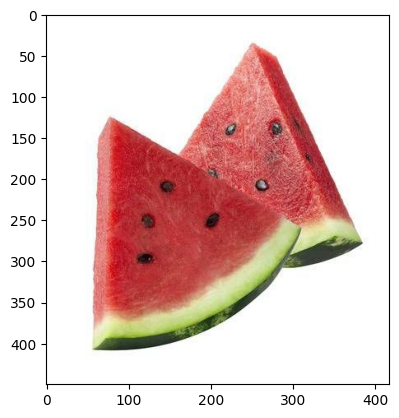

In [25]:
plt.imshow(img_bgr[:,:,::-1])
plt.show()

## 图像预处理

In [26]:
# 尺寸缩放
img_tensor = cv2.resize(img_bgr, (256, 256))

# 三通道的均值
mean = (0.485, 0.456, 0.406)

# 三通道的标准差
std = (0.229, 0.224, 0.225)

# 归一化
img_tensor = ((img_tensor / 255) - mean) / std
img_tensor = img_tensor.astype('float32')

## 推理预测

In [27]:
# 装填数据
# https://docs.aidlux.com/#/intro/ai/ai-aidlite?id=_5setinput_float32
aidlite.setInput_Float32(img_tensor)

Result(id=91, result=None, error=None)

In [28]:
# 推理预测
# https://docs.aidlux.com/#/intro/ai/ai-aidlite?id=_7invoke
aidlite.invoke() 

Result(id=91, result=None, error=None)

In [29]:
# 获得推理预测结果
result = aidlite.getOutput_Float32()

## 解析预测结果

In [30]:
result.shape

(30,)

In [31]:
# # 每个类别的 logit 分数（非置信度）
# result

In [32]:
# 置信度最高类别 ID
pred_id = np.argmax(result)

In [33]:
pred_id

25

## 载入类别名称与ID映射表

In [34]:
# 中文类别名称
idx_to_labels = np.load('idx_to_labels.npy', allow_pickle=True).item()

In [35]:
# idx_to_labels

In [36]:
pred_class = idx_to_labels[pred_id]

In [37]:
pred_class

'西瓜'

## 将预测类别名称写在图片上

In [38]:
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB) # BGR转RGB
img_pil = Image.fromarray(img_rgb) # array 转 PIL

In [39]:
draw = ImageDraw.Draw(img_pil)

In [40]:
# 文字坐标，中文字符串，字体，rgba颜色
draw.text((100, 50), pred_class, font=font, fill=(255, 0, 0, 1))

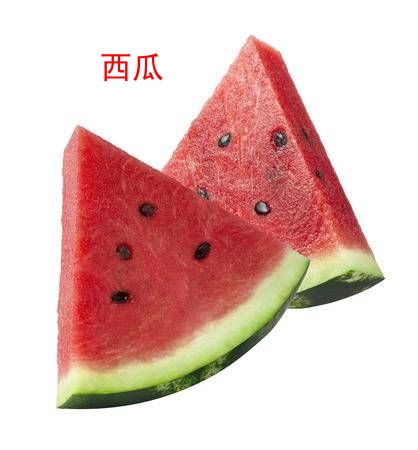

In [41]:
img_pil

## 将预测结果显示在手机屏幕上

In [ ]:
img_rgb = np.array(img_pil) # PIL 转 array
img_bgr = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2BGR) # RGB 转 BGR
cvs.imshow(img_bgr)